# ELECTRICITY PRICE PREDICTION

### IMPORTING REQUIRED LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import warnings
warnings.simplefilter('ignore')

### READING DATASET

In [2]:
dataset=pd.read_csv("C:/Users/reddy/OneDrive/Desktop/pantech/electricityprice.csv",na_values=['?'])

In [3]:
dataset

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [4]:
dataset.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [5]:
dataset.tail()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60
38013,31/12/2013 23:30,New Year's Eve,1,1,1,31,12,2013,47,1064.00,3624.25,33.83,5.0,16.7,308.01,1020.0,3517.08,34.90


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

In [7]:
dataset.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38009.000000,38012.000000,38012.000000,37719.000000,37715.000000,38007.000000,38009.000000,38012.000000,38012.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105,544.261451,4020.085019,62.720388,9.626369,19.211770,479.373040,520.762819,3785.973841,64.136823
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108,414.364629,860.476866,32.252334,4.439934,9.571311,85.354706,378.282975,843.269455,35.415036
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.680000,2183.940000,0.000000,-4.000000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000,189.670000,3281.207500,45.530000,6.000000,13.000000,421.105000,199.000000,3058.277500,45.780000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000,441.980000,4103.600000,55.230000,9.000000,18.500000,480.310000,445.000000,3865.745000,55.545000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000,839.460000,4638.532500,70.320000,13.000000,24.100000,537.520000,793.000000,4427.590000,72.110000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1680.000000,6492.910000,587.580000,25.000000,75.900000,842.880000,1769.000000,6309.750000,1000.000000


### CONVERTING OBJECT DATATYPE TO NUMERIC DATATYPE

In [8]:
dataset["ForecastWindProduction"] = pd.to_numeric(dataset["ForecastWindProduction"], errors= 'coerce')
dataset["SystemLoadEA"] = pd.to_numeric(dataset["SystemLoadEA"], errors= 'coerce')
dataset["SMPEA"] = pd.to_numeric(dataset["SMPEA"], errors= 'coerce')
dataset["ORKTemperature"] = pd.to_numeric(dataset["ORKTemperature"],errors= 'coerce')
dataset["ORKWindspeed"] = pd.to_numeric(dataset["ORKWindspeed"], errors= 'coerce')
dataset["CO2Intensity"] = pd.to_numeric(dataset["CO2Intensity"], errors= 'coerce')
dataset["ActualWindProduction"] = pd.to_numeric(dataset["ActualWindProduction"], errors= 'coerce')
dataset["SystemLoadEP2"] = pd.to_numeric(dataset["SystemLoadEP2"], errors= 'coerce')
dataset["SMPEP2"] = pd.to_numeric(dataset["SMPEP2"], errors= 'coerce')

### CHECKING NULL VALUES

In [9]:
dataset.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

### DROPING NULL VALUES

In [10]:
dataset=dataset.dropna()

### CHECKING NULL VALUES

In [11]:
dataset.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

### VISUALIZATION

<AxesSubplot:>

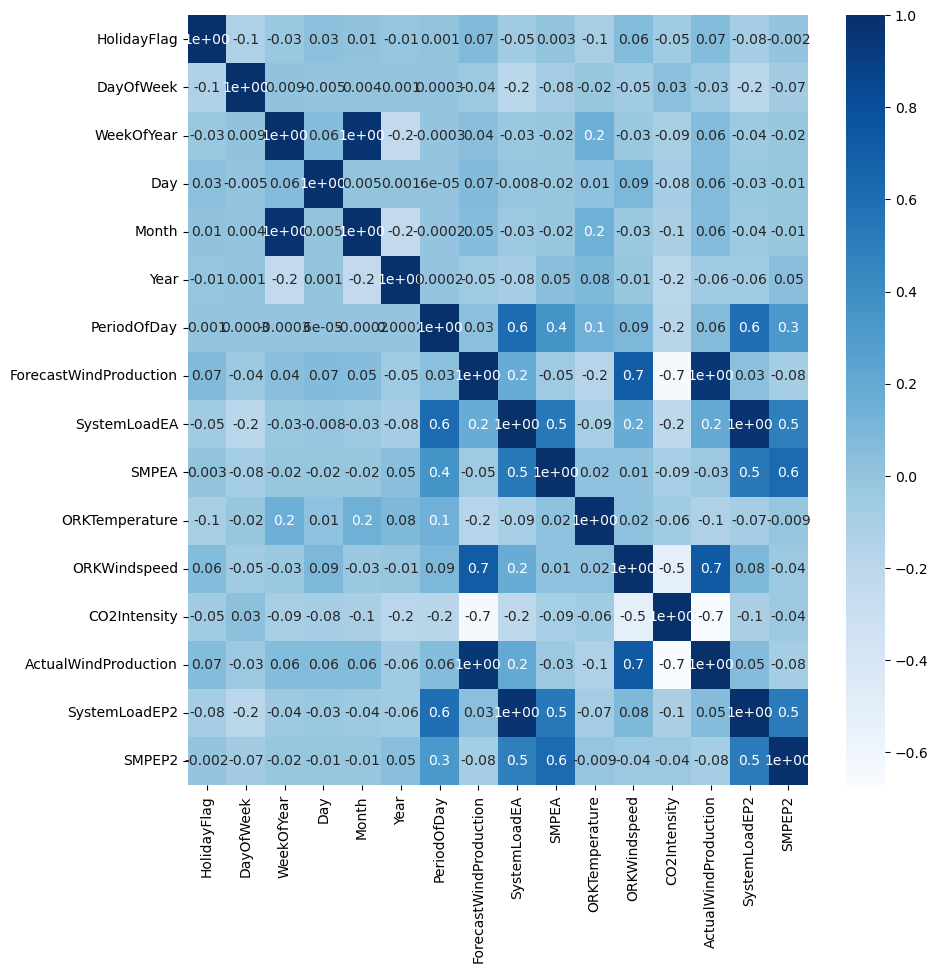

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,fmt='0.1',cmap='Blues')

<AxesSubplot:xlabel='SMPEP2', ylabel='Density'>

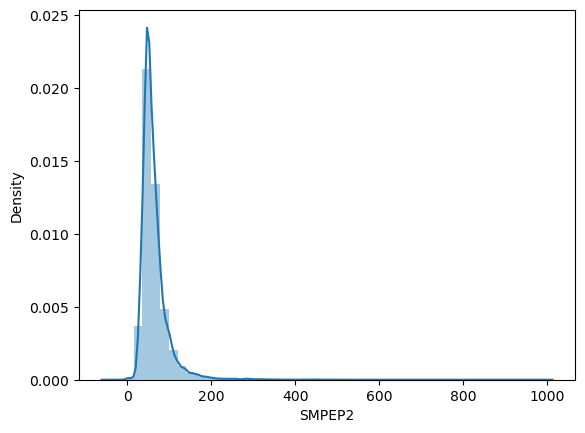

In [43]:
sns.distplot(dataset['SMPEP2'])

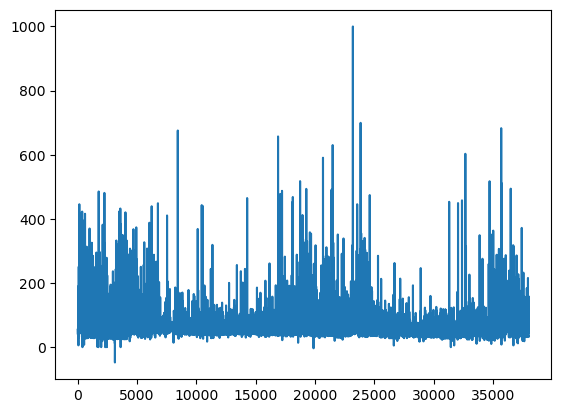

In [14]:
plt.plot("SMPEP2", data=dataset)

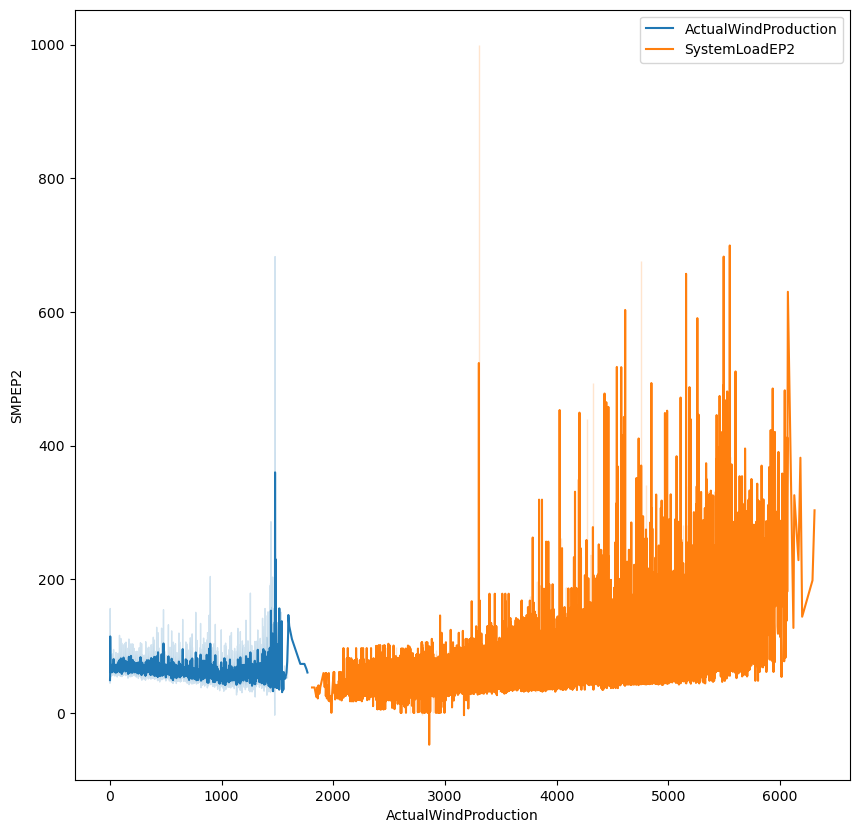

In [44]:
ax,fig=plt.subplots(figsize=(10,10))
ax=sns.lineplot(x=dataset['ActualWindProduction'],y=dataset['SMPEP2'],label='ActualWindProduction')
ax1=sns.lineplot(x=dataset['SystemLoadEP2'],y=dataset['SMPEP2'],label='SystemLoadEP2')

In [16]:
x = dataset.drop(['Holiday','DateTime','SMPEP2'],axis=1)

In [17]:
x

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95
38010,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00
38011,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29
38012,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99


### DATA STANDARDIZATION

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()

In [20]:
x=ss.fit_transform(x)

In [21]:
x

array([[-0.19759766, -0.99976817,  1.02592524, ...,  1.42292558,
        -0.43351663, -0.74532335],
       [-0.19759766, -0.99976817,  1.02592524, ...,  1.47822689,
        -0.53672545, -0.96678629],
       [-0.19759766, -0.99976817,  1.02592524, ...,  1.29682449,
        -0.55260373, -1.13177672],
       ...,
       [ 5.06078867, -0.99976817, -1.73895312, ..., -2.33192798,
         1.17018972, -0.38843556],
       [ 5.06078867, -0.99976817, -1.73895312, ..., -2.07890392,
         1.13843316, -0.26535444],
       [ 5.06078867, -0.99976817, -1.73895312, ..., -2.01373995,
         1.32367976, -0.32103173]])

In [22]:
y=dataset['SMPEP2']

In [23]:
y

0        54.32
1        54.23
2        54.23
3        53.47
4        39.87
         ...  
38009    42.45
38010    33.83
38011    31.75
38012    50.60
38013    34.90
Name: SMPEP2, Length: 37682, dtype: float64

### SPLITING DATASET

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

### LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model1=LinearRegression()

In [28]:
model1.fit(x_train,y_train)

LinearRegression()

In [29]:
y1_pred=model1.predict(x_test)

In [58]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [31]:
r2_score(y_test,y1_pred)

0.458461127636151

In [62]:
print("mean absolute error:",mean_absolute_error(y_test,y1_pred))

mean absolute error: 14.020845639548734


### RANDOM FOREST REGRESSOR

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [33]:
y2_pred=model.predict(x_test)

In [34]:
r2_score(y_test,y2_pred)

0.6423209452694076

In [61]:
print("mean absolute error:",mean_absolute_error(y_test,y2_pred))

mean absolute error: 8.584124014860024


### XGBREGRESSOR

In [35]:
from xgboost import XGBRegressor

In [36]:
model3=XGBRegressor()

In [37]:
model3.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
y3_pred=model3.predict(x_test)

In [39]:
r2_score(y_test,y3_pred)

0.5597521817796371

In [60]:
print("mean absolute error:",mean_absolute_error(y_test,y3_pred))

mean absolute error: 11.24599412328703


### PREDICTING ELECTRICITY PRICE

In [69]:
x=np.array([0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60]).reshape(1,-1)
x=ss.fit_transform(x)

In [70]:
model3.predict(x)

array([65.861206], dtype=float32)